# MPC Tensor - Party 2
### With Duet

In this tutorial we will show you how to perform secure multiparty computation with data you cannot see. There are two parts/notebooks:
* [POC-MPCTensor-Duet-Party1-DS](POC-MPCTensor-Duet-Party1-DS.ipynb). The data-scientist will be the responsible of perform any secure computation.
* [POC-MPCTensor-Duet-Party2-DO](POC-MPCTensor-Duet-Party2-DO.ipynb) (this notebook). The Data Owner will store data in his Duet server and will be available for the data-scientist.

## 0 - Libraries


Let's import the main libraries

In [1]:
import torch  #  tensor computation
import syft as sy  # core library for remote execution

sy.load("sympc")  # openmined library which helps to perform mpc (see https://github.com/OpenMined/SyMPC)

## 1 - Duet Server and connection to Data Owner (Party 2)

### 1.1 - Join to Data Scientist Duet Server (Party 1)

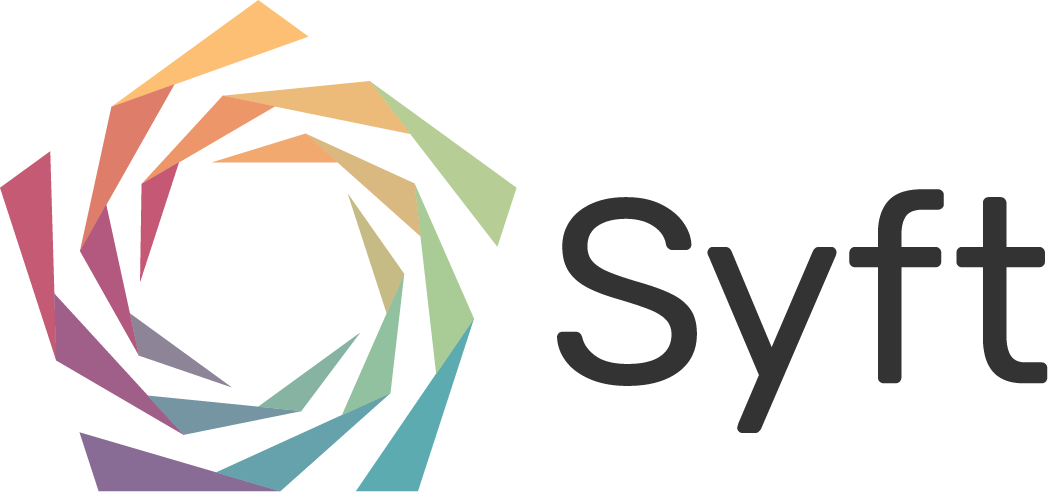

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >

    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ > STEP 1: Send the following Duet Client ID to your duet partner!
♫♫♫ > Duet Client ID: d1003a066208c22572c182797be5b608

♫♫♫ > ...waiting for partner to connect...

♫♫♫ > CONNECTED!


In [2]:
duet_p1 = sy.join_duet("003b50cedc695ad9ae18c3cd6b3ad80a")

If you see a green message saying CONNECTED!, that means that everything was ok, however there is no data to work with.
Now, the Data Owner wiill launch his own Duet server and will publish some data

## 1.2 - Launch a Duet Server

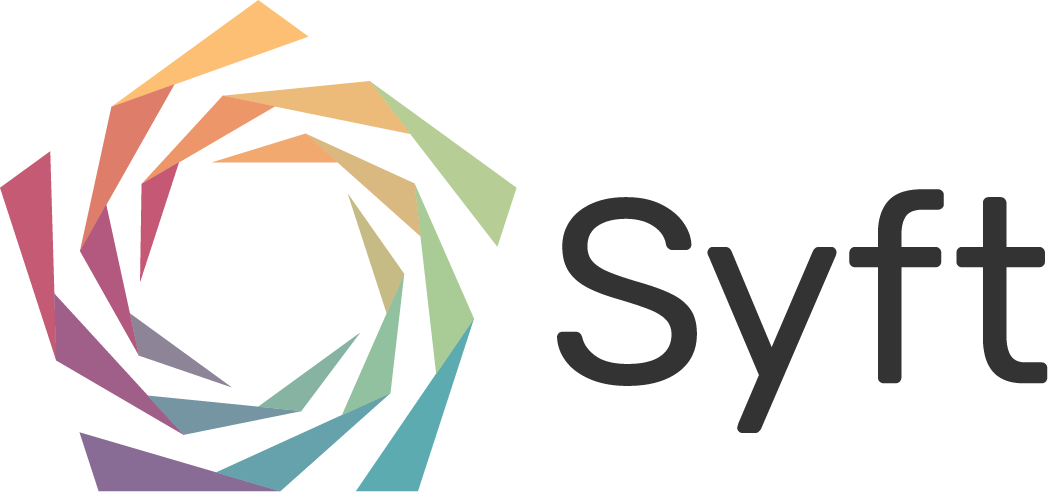

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >

    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ > Duet Server ID: 341f4a9c6b78b0c8a4cc5e86e7af02e0

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("341f4a9c6b78b0c8a4cc5e86e7af02e0")

♫♫♫ > STEP 2: Have your duet partner send their Client ID to you and enter it below!
♫♫♫ > Duet Partner's Client ID: f1bad9346d605b6feb6e34daa830257d

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  -  Objects: 5  Requests: 0   Messages: 81                                 

In [3]:
duet_p2 = sy.launch_duet()

Go now to [POC-MPCTensor-Duet-Party1-DS](POC-MPCTensor-Duet-Party1-DS.ipynb), execute Section 1.2 where the data scientist connect with the data owner, and continue with this notebook until the end.

## 2- Secret data

Now the Data Owner will publish some data that he wants to share in a private way

Let's check that there is no data at this moment in the server,

In [4]:
duet_p2.store.pandas

Empty DataFrame
Columns: []
Index: []

and let's publish the datasets

### 2.1 - Publish the secret data

In [5]:
x = torch.tensor([50])
x.send(duet_p2, pointable=True, tags=["#test_tensor_1"], description= "Dummy tensor to test the sum of tensors")

In [6]:
x = torch.tensor([[1,2],[3,4]])
x.send(duet_p2, pointable=True, tags=["#test_tensor_2"], description= "Dummy tensor to test the matmul of tensors")

Let's check again the stored data

In [7]:
duet_p2.store.pandas

ID              Tags  \
0  <UID: e89226117f7b4ca6885bbd0803f9df9f>  [#test_tensor_1]   
1  <UID: 45552b85c2774ee29c618005784163ae>  [#test_tensor_2]   

                                  Description  
0     Dummy tensor to test the sum of tensors  
1  Dummy tensor to test the matmul of tensors

If everything was ok, you should see a pandas dataframe with two rows corresponding to the stored datasets. Now the data-scientist has everything ready to perform remote operations via SMPC.

### 2.2 -  Automate request response

Now the data owner instead of handling the requests manually, he will accept the request of type `reconstruct` automatically.

In [8]:
duet_p2.requests.add_handler(
    name="reconstruct",
    action="accept"
)

## Congratulations!!! - Time to Join the Community!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement toward privacy preserving, decentralized ownership of AI and the AI supply chain (data), you can do so in the following ways!

### Star PySyft and SyMPC on GitHub
The easiest way to help our community is just by starring the GitHub repos! This helps raise awareness of the cool tools we're building.

* [Star PySyft](https://github.com/OpenMined/PySyft)
* [Star SyMPC](https://github.com/OpenMined/SyMPC/)

### Join our Slack!
The best way to keep up to date on the latest advancements is to join our community! You can do so by filling out the form at http://slack.openmined.org

### Join a Code Project!
The best way to contribute to our community is to become a code contributor! At any time you can go to PySyft GitHub Issues page and filter for "Projects". This will show you all the top level Tickets giving an overview of what projects you can join! If you don't want to join a project, but you would like to do a bit of coding, you can also look for more "one off" mini-projects by searching for GitHub issues marked "good first issue".

* [PySyft Good First Issue Tickets](https://github.com/OpenMined/PySyft/labels/Good%20first%20issue%20%3Amortar_board%3A)
* [SyMPC Good First Issue Tickets](https://github.com/OpenMined/SyMPC/labels/good%20first%20issue)

### Donate
If you don't have time to contribute to our codebase, but would still like to lend support, you can also become a Backer on our Open Collective. All donations go toward our web hosting and other community expenses such as hackathons and meetups!

* [OpenMined's Open Collective Page](https://opencollective.com/openmined)